In [69]:
train_dir = 'data\\images\\train'
validate_dir = 'data\\images\\validate'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

validate_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=22,
        class_mode='categorical')

print("Test set: ")
# Generating the Testing Data
validate_generator = validate_datagen.flow_from_directory(
        validate_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=12,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('Kształt danych wsadowych: ', data_batch.shape)
    print('Kształt danych wsadowych: ', labels_batch.shape)
    break

Found 111 images belonging to 16 classes.


Test set: 
Found 48 images belonging to 16 classes.
Kształt danych wsadowych:  (22, 64, 64, 1)
Kształt danych wsadowych:  (22, 16)


In [70]:
# class_indices have the numeric tag for each face
TrainClasses=train_generator.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future referenc
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'konrad', 1: 'subject01', 2: 'subject02', 3: 'subject03', 4: 'subject04', 5: 'subject05', 6: 'subject06', 7: 'subject07', 8: 'subject08', 9: 'subject09', 10: 'subject10', 11: 'subject11', 12: 'subject12', 13: 'subject13', 14: 'subject14', 15: 'subject15'}

 The Number of output neurons:  16


In [71]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2
 

model= Sequential()
model.add(Convolution2D(32, (4, 4), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(64, (4, 4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(128, (4, 4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(128, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(16, activation='softmax'))

from tensorflow.keras import optimizers
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=["accuracy"])

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


# Starting the model training
history = model.fit_generator(train_generator,
                    steps_per_epoch=5,
                    epochs=100,
                    validation_data=validate_generator,
                    validation_steps=4)
 

Epoch 1/100


C:\Users\Konrad\AppData\Local\Temp\ipykernel_6528\4197949194.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


5/5 [==============================] - 2s 144ms/step - loss: 33.9836 - accuracy: 0.0449 - val_loss: 8.9223 - val_accuracy: 0.0833
Epoch 2/100
5/5 [==============================] - 0s 98ms/step - loss: 8.9969 - accuracy: 0.0674 - val_loss: 3.3745 - val_accuracy: 0.0625
Epoch 3/100
5/5 [==============================] - 1s 95ms/step - loss: 3.7681 - accuracy: 0.0674 - val_loss: 2.9582 - val_accuracy: 0.0625
Epoch 4/100
5/5 [==============================] - 1s 97ms/step - loss: 3.0800 - accuracy: 0.0449 - val_loss: 2.8225 - val_accuracy: 0.1042
Epoch 5/100
5/5 [==============================] - 1s 109ms/step - loss: 2.9707 - accuracy: 0.0674 - val_loss: 2.8012 - val_accuracy: 0.0625
Epoch 6/100
5/5 [==============================] - 0s 115ms/step - loss: 2.8369 - accuracy: 0.0674 - val_loss: 2.7544 - val_accuracy: 0.1042
Epoch 7/100
5/5 [==============================] - 1s 95ms/step - loss: 2.7512 - accuracy: 0.2135 - val_loss: 2.6992 - val_accuracy: 0.2292
Epoch 8/100
5/5 [===========

INFO:tensorflow:Assets written to: data_best\assets


INFO:tensorflow:Assets written to: data_best\assets


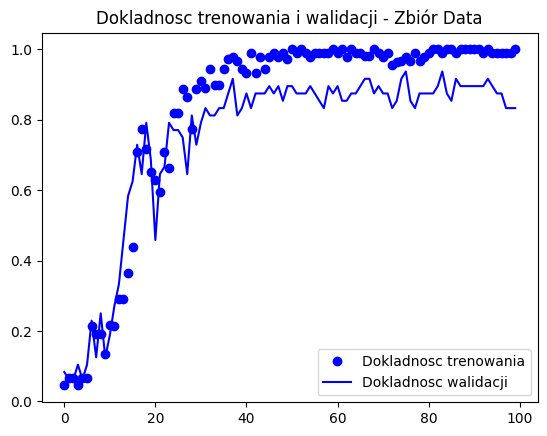

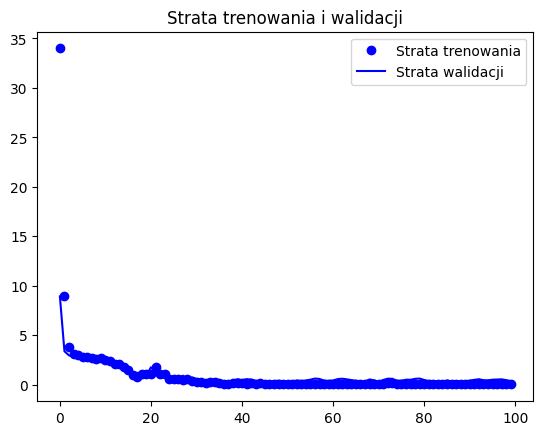

In [73]:
#model.save('data_best')
#new_model = tf.keras.models.load_model('saved_model/my_model')

import matplotlib.pyplot as plt
# Accessing the metrics after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the results
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji - Zbiór Data')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend() 
plt.show()

Prediction is:  konrad


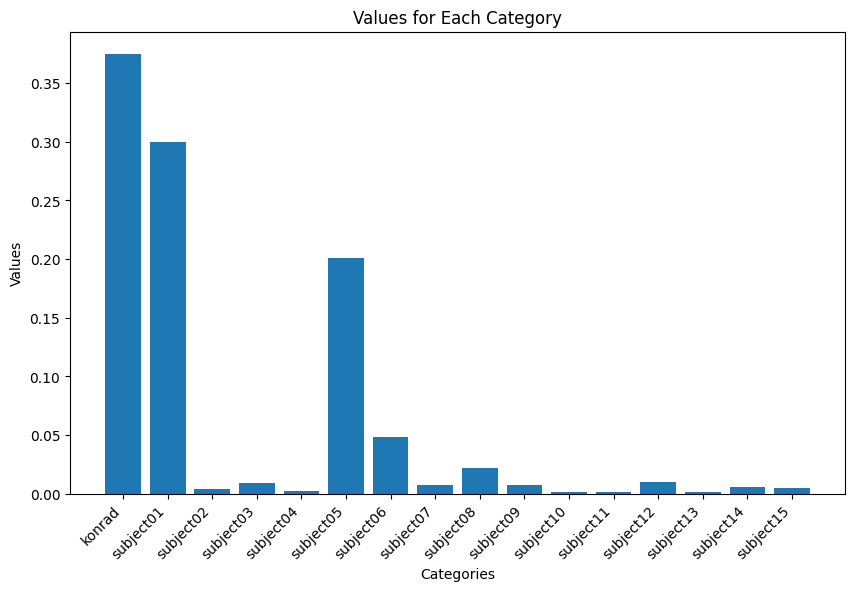

In [76]:
import numpy as np
from keras.preprocessing import image

ImagePath= 'data\\images\\test\\konrad\\ja_nowe.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64), color_mode='grayscale')
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=model.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

if len(ResultMap) == result.shape[1]:
    # Get labels and values
    labels = list(ResultMap.values())
    values = result.flatten()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Values for Each Category')
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
    plt.show()
else:
    print("Length mismatch between ResultMap and result_array.")